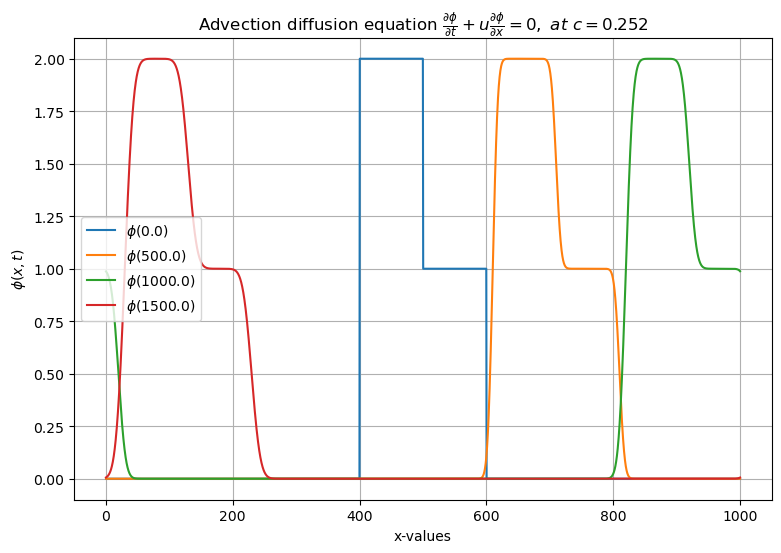

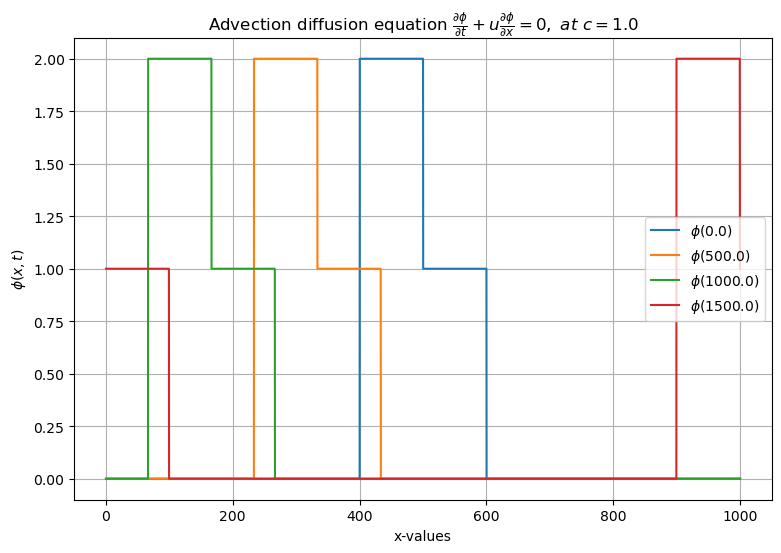

In [1]:

"""In this work we are going to solve linear advection-diffusion partial differential equation
using forward in time and backward in space as it is more stable for velocity between 0 and 1."""


import numpy as np
import matplotlib.pyplot as plt

#Define the constant
dt=0.15
dx=0.25
u=0.42
nx=1000
nt=2000
x=np.arange(0,1000+dx,dx)
u=np.zeros(len(x))
c=0.42*0.15/0.25

def initi_cond(x):
    """
    Function to Initialize the value of advection based on the input value of x.
    params:
        x: a scalar value.
          """
    if x>=400 and x<500.0:
        return 2.0
    elif x>=500. and x<600:
        return 1.0
    else:
        return 0.0
    

def Map(f,phi,x):
    
    """
    Function for updating the value of array phi based on the values of array x.
    params:
        phi: 1D array of the same length as x.
        x: 1D array .
        f: function that will be applied to x values to update phi.
          """
    for i in range(len(x)):
        phi[i]=f(x[i])
    return phi

u[:]=Map(initi_cond,u,x)


#Function for differential equation
def func(arr,c):
    """The function for updating value of arr receive:
    params:
         arr: array of 1D
         c: constant that stands for ration of u*dt/dx
         """
    return (1-c)*arr+c*np.roll(arr,1)


def Plot(func,t_start,t_end,u,x,c,dt=0.15):
    
    """
       Function for plotting our results, u.
       
       params:
       
           func: function for updating value of array u.
           t_start: starting time.
           t_end: ending time.
           u: array of 1D.
           x: array of space values.
           c: constant that stands for ration of u*dt/dx
           dt: change in time
    
           """
    

   
    fig,ax=plt.subplots(figsize=(9,6))
    while t_start<t_end:

        new_u=func(u,c)#Assign the new value for pde to new_u that will be used to update the value of u.

        u=new_u
        
        if t_start%500<dt:
            
            ax.plot(x,u)
           
            ax.set_title(r'Advection diffusion equation $\frac{\partial \phi}{\partial t}+u\frac{\partial \phi}{\partial x}=0, \ at\ c= %s$'%c)
            ax.set_ylabel(r'$\phi(x,t)$')
            ax.set_xlabel('x-values')
            ax.grid('on')
           
           

      
        u=new_u
        t_start=dt+t_start
        
    plt.legend([r'$\phi(0.0)$',r'$\phi(500.0)$',r'$\phi(1000.0)$',r'$\phi(1500.0)$',r'$\phi(2000.0)$'])
    plt.show() 
    plt.ion()
   
    
  
 
Plot(func,t_start=0.0,t_end=2000.,u=u,x=x,c=c,dt=0.15)

""" IF C IS EQUAL TO 1."""

Plot(func,t_start=0.0,t_end=2000.,u=u,x=x,c=1.,dt=0.15)